![example](images/director_shot.jpeg)

# Project Title

**Authors:** Ian Butler, Ashli Dougherty, Nicolas Pierce
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

For a new studio we decided that we needed to see which genre of movies would be the best investment for a studio to produce. 

We decided to investigate the relationships between: 
- gross product and genre of movie
(are there common elements in these films that should be included?)
- viewer ratings and genre of movie 
- return on investment and genre of movie

We believe that these three variables will allow us to determine which type of movie will appeal to audiences and be profitable to Microsoft. 

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The below cell imports standard packages and also unzips the currently zipped IMDB dataset into ./zippedData

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# from Kevin Rivera
from zipfile import ZipFile
# specifying the zip file name
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall(path='./zippedData')
    print('Done!')

%matplotlib inline

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328
Extracting all the files now...
Done!


In [2]:
conn = sqlite3.Connection('./zippedData/im.db')
cursor = conn.cursor()

In [3]:
testq = """

select
    *
from
    movie_basics

"""

In [4]:
testq_results = pd.read_sql(testq, conn)

In [5]:
testq_results

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Preparing Data for Domestic Gross and Genres

Updated for push
We wanted to see which type of movies were generating the most revenue. We examined domestic box office returns from US movies between the years of 2010 and 2018. Data was pulled from https://www.boxofficemojo.com/?ref_=bo_nb_cso_mojologo
***
We chose to focus just on domestic gross values as there are 1350 null values for foreign_gross compared to only 28 null values for domestic_gross.
***
Due to the large difference between the minimum (100) and the max (9 million) values for domestic_gross, the null values will be dropped as inserting either the mean or median will greatly skew the data.

In [6]:
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
print(bom_df['foreign_gross'].isna().sum())
print(bom_df['domestic_gross'].isna().sum())

1350
28


In [8]:
bom_df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [9]:
bom_domestic_df = bom_df.loc[: , ['title','domestic_gross']]
bom_domestic_df_clean = bom_domestic_df.dropna(subset =['domestic_gross'])
bom_domestic_df_clean.sort_values(by='domestic_gross', ascending = False)

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0
...,...,...
3078,2:22,400.0
2321,The Chambermaid,300.0
2757,Satanic,300.0
2756,News From Planet Mars,300.0


In [10]:
basics_q = """

SELECT
    DISTINCT mb.primary_title as title,
    mb.genres,
    ma.region

FROM
    movie_basics as mb
        INNER JOIN movie_akas as ma
            ON mb.movie_id = ma.movie_id

WHERE
    ma.region = 'US'

GROUP BY
    mb.genres,
    title

"""

mv_basics = pd.read_sql(basics_q, conn)
mv_basics

,title,genres,region
0,#humbled,None,US
1,$MOKE,None,US
2,&,None,US
3,10 Days in Daytona: Bike Week 2012,None,US
4,1000 Waves to Surfing Glory,None,US
...,...,...,...
47138,Vengeance Without Mercy,Western,US
47139,Western World,Western,US
47140,Wild Bill Hickok: Swift Justice,Western,US
47141,Wild Faith,Western,US


In [11]:
mv_basics['title'].duplicated(keep =False).value_counts()

False    43865
True      3278
Name: title, dtype: int64

In [12]:
mv_basics_dropped = mv_basics[(mv_basics['title'].duplicated(keep =False)) == False]
mv_basics_dropped

,title,genres,region
0,#humbled,None,US
1,$MOKE,None,US
2,&,None,US
3,10 Days in Daytona: Bike Week 2012,None,US
4,1000 Waves to Surfing Glory,None,US
...,...,...,...
47138,Vengeance Without Mercy,Western,US
47139,Western World,Western,US
47140,Wild Bill Hickok: Swift Justice,Western,US
47141,Wild Faith,Western,US


In [13]:
genre_domgross = mv_basics_dropped.merge(bom_domestic_df_clean, how='inner', on='title')
genre_domgross.head()
#merged the two dataframes so that gross title, genre, and domestic gross are all on same dataframe 

,title,genres,region,domestic_gross
0,Mountain,None,US,365000.0
1,The Man with the Iron Fists,Action,US,15600000.0
2,War of the Arrows,Action,US,251000.0
3,Falcon Rising,"Action,Adventure",US,11800.0
4,Ragnarok,"Action,Adventure",US,1400.0


In [14]:
genre_domgross_clean = genre_domgross.dropna(subset=['genres'])
genre_domgross_clean.head(15)
#dropped all null values from genres

,title,genres,region,domestic_gross
1,The Man with the Iron Fists,Action,US,15600000.0
2,War of the Arrows,Action,US,251000.0
3,Falcon Rising,"Action,Adventure",US,11800.0
4,Ragnarok,"Action,Adventure",US,1400.0
5,Big Hero 6,"Action,Adventure,Animation",US,222500000.0
6,Bilal: A New Breed of Hero,"Action,Adventure,Animation",US,491000.0
7,The Croods,"Action,Adventure,Animation",US,187200000.0
8,Legend of the Guardians: The Owls of Ga'Hoole,"Action,Adventure,Animation",US,55700000.0
9,How to Train Your Dragon,"Action,Adventure,Animation",US,217600000.0
10,How to Train Your Dragon 2,"Action,Adventure,Animation",US,177000000.0


In [15]:
#pulled each average for each main genre by hand...possible clean up with loop/function?
action = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Action')]
action.mean()
adventure = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Adventure')]
adventure.mean()
animation = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Animation')]
animation.mean()
biography = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Biography')]
biography.mean()
comedy = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Comedy')]
comedy.mean()
documentary = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Documentary')]
documentary.mean()
drama = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Drama')]
drama.mean()
family = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Family')]
family.mean()
fantasy = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Fantasy')]
fantasy.mean()
horror = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Horror')]
horror.mean()
music = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Music')]
music.mean()
mystery = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Mystery')]
mystery.mean()
romance = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Romance')]
romance.mean()
sci_fi = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Sci-Fi')]
sci_fi.mean()
thriller = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Thriller')]
thriller.mean()

domestic_gross    4.333931e+07
dtype: float64

In [16]:
avg_main_genre_ratings = {
    
    'Action': 8.749614e+07,
    'Adventure': 1.148395e+08,
    'Animation': 1.128608e+08,
    'Biography': 2.854831e+07,
    'Comedy': 4.654518e+07,
    'Documentary': 3270702.98,
    'Drama':  2.327981e+07,
    'Family': 6.359999e+07, 
    'Fantasy': 6.933615e+07,
    'Horror': 3.157331e+07,
    'Music': 3.052755e+07,
    'Mystery': 3.378377e+07,
    'Romance': 2.223531e+07,
    'Sci-Fi': 1.390575e+08,
    'Thriller': 4.333931e+07,
    
}
list(avg_main_genre_ratings.keys())
list(avg_main_genre_ratings.values())

[87496140.0,
 114839500.0,
 112860800.0,
 28548310.0,
 46545180.0,
 3270702.98,
 23279810.0,
 63599990.0,
 69336150.0,
 31573310.0,
 30527550.0,
 33783770.0,
 22235310.0,
 139057500.0,
 43339310.0]

In [17]:
top_40_grossing = genre_domgross_clean.sort_values(by=['domestic_gross'], ascending=False).head(40)
top_40_grossing

,title,genres,region,domestic_gross
126,Black Panther,"Action,Adventure,Sci-Fi",US,700100000.0
124,Avengers: Infinity War,"Action,Adventure,Sci-Fi",US,678800000.0
134,Jurassic World,"Action,Adventure,Sci-Fi",US,652300000.0
103,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",US,620200000.0
11,Incredibles 2,"Action,Adventure,Animation",US,608600000.0
149,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",US,532200000.0
414,Finding Dory,"Adventure,Animation,Comedy",US,486300000.0
120,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",US,459000000.0
379,The Dark Knight Rises,"Action,Thriller",US,448100000.0
132,The Hunger Games: Catching Fire,"Action,Adventure,Sci-Fi",US,424700000.0


In [18]:
combo_genre = top_40_grossing.groupby('genres').mean().sort_values(by='domestic_gross', ascending=False)
combo_genre.reset_index(inplace=True)
combo_genre

,genres,domestic_gross
0,"Action,Adventure,Animation",6.086000e+08
1,"Action,Thriller",4.481000e+08
2,"Action,Adventure,Sci-Fi",4.381000e+08
3,"Action,Adventure,Fantasy",4.027000e+08
4,"Adventure,Animation,Comedy",3.858500e+08
5,"Action,Adventure,Comedy",3.540333e+08
6,"Action,Crime,Thriller",3.530000e+08
7,"Action,Biography,Drama",3.501000e+08
8,"Horror,Thriller",3.275000e+08
9,"Action,Adventure,Thriller",3.044000e+08


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Average Gross Domestic Revenue by Genre
The graph below shows the average domestic gross revenue that each "main" genre generated from 2010 to 2018. 
What would be considered a main movie genre was taken from: https://en.wikipedia.org/wiki/Film_genre and include: 
**Action, Adventure, Animation, Biography, Comedy, Documentary, Drama, Family, Fantasy, Horror, Music, Mystery, Romance, Sci-Fi, and Thriller.** 

/Users/ashlidougherty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


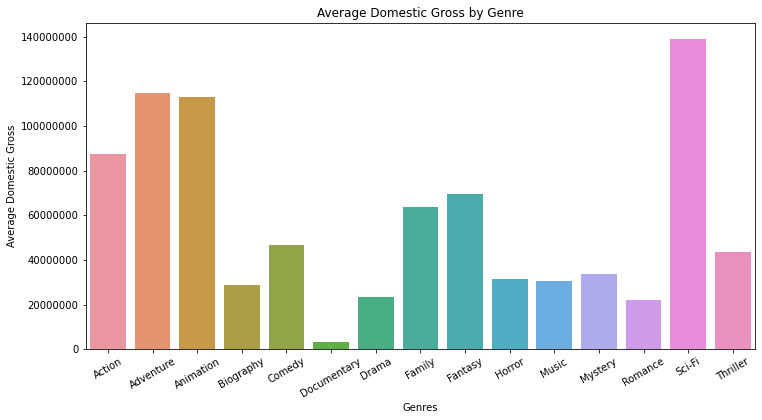

In [19]:
x = list(avg_main_genre_ratings.keys())
y = list(avg_main_genre_ratings.values())


plt.figure(figsize=(12,6))
ax = sns.barplot(x, y)
plt.title('Average Domestic Gross by Genre')
plt.ylabel('Average Domestic Gross')
plt.xlabel('Genres')
plt.ticklabel_format(style='plain', axis = 'y')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

### Average Gross Domestic Revenue by Combined Genres
Most movies do not fall within a single genre. We wanted to investivate which combination of genres would create the highest domestic box office revenue. 
The graph below shows the combined genres of the top 40 grossing movies from the dataframe and their average domestic gross.
***
Of the 12 combinations of genres, the most common genres are **Action** and **Adventure** (both appearing in 67% of the combinations). The least common genres are **Crime** and **Biography** (both appearing only in 8% of the combinations). 



<ipython-input-20-03dbef74dd58>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','100', '200', '300', '400', '500', '600'])


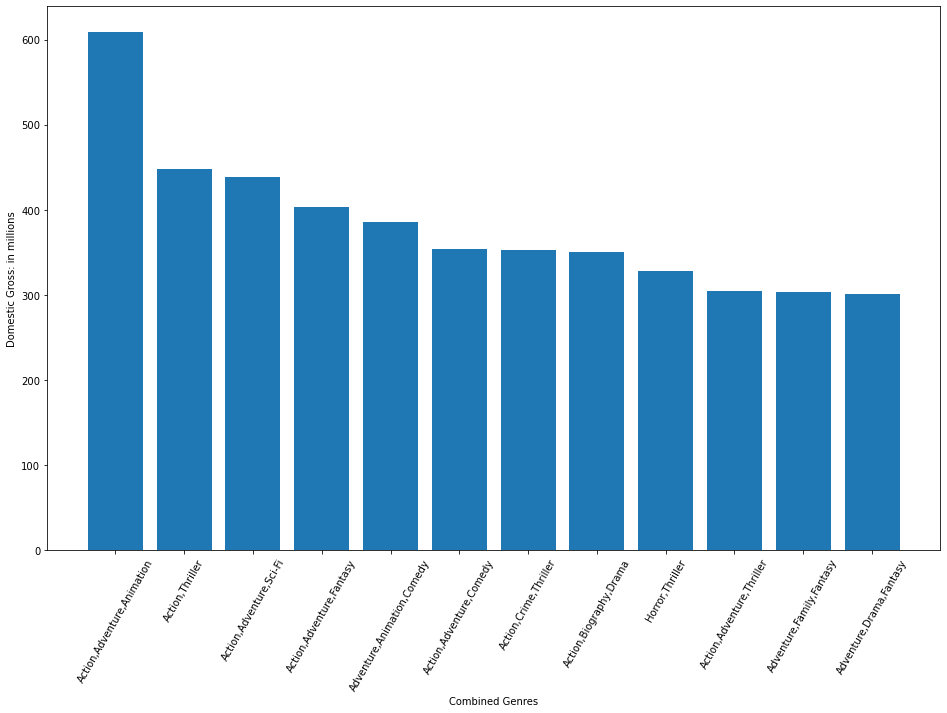

In [20]:
fig, ax = plt.subplots(figsize=(16,10))
x = combo_genre['genres']
y = combo_genre['domestic_gross']

ax.bar(x, y)
ax.tick_params(axis="x", labelrotation=60)
ax.set_yticklabels(['0','100', '200', '300', '400', '500', '600'])
ax.set_xlabel('Combined Genres')
ax.set_ylabel('Domestic Gross: in millions');

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***